### Những thuật toán phát hiện bất thường 
 * Khoảng phân vị (Interquatile Range)
 * Isolation Forest
 * Median Absolute Devitation
 * KNN (K-Nearest Neighbors)
 * HBOS (Histogram Based Outlier Detection)
 * LOF (Local Outlier Factor)
 * OCSVM (One-Class Support Vector Machine)


In [1]:
import warnings
import numpy as np
import pandas as pd
from pyod.models.mad import MAD
from pyod.models.knn import KNN
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from pyod.models.hbos import HBOS
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM


In [2]:
col_names = ['time_stamp', 'source', 'message']
# col_names = ['ip_address', 'time_stamp', 'request', 'status_code', 'response_size', 'user_agent']

file_path = '../dataset/access_log_1.csv'
data = pd.read_csv(file_path, header = 0 , names = col_names)
data['time_stamp'] = pd.to_datetime(data['time_stamp'])

In [3]:
CONST_FORMAT_TIME = '%Y-%m-%d'

In [4]:
def format_date_time(data, format = CONST_FORMAT_TIME): 
    df = data.copy()
    df['date'] = data['time_stamp'].dt.strftime(CONST_FORMAT_TIME)
    df = df.groupby(['date']).size().reset_index(name='count')
    return df

In [5]:
def plot_anomalies(df, x='date', y='count', title =''):

    # categories will be having values from 0 to n
    # for each values in 0 to n it is mapped in colormap
    categories = df['Predictions'].to_numpy()
    colormap = np.array(['g', 'r'])

    f = plt.figure(figsize=(12, 4))
    f = plt.scatter(df[x], df[y], c=colormap[categories])
    f = plt.xlabel(x)
    f = plt.ylabel(y)
    f = plt.xticks(rotation=90)
    if title != '': 
        plt.title(title)
    plt.show()


def fit_model(model, data, column='count'):
    # fit the model and predict it
    df = data.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    df['Predictions'] = predictions
    
    return df

### Tứ phân vị (IQR (Interquartile Range))


* Tìm được mức giới hạn bình thường là 111532

Lower threshold: -58094.850000000006, 
Upper threshold: 111532.35



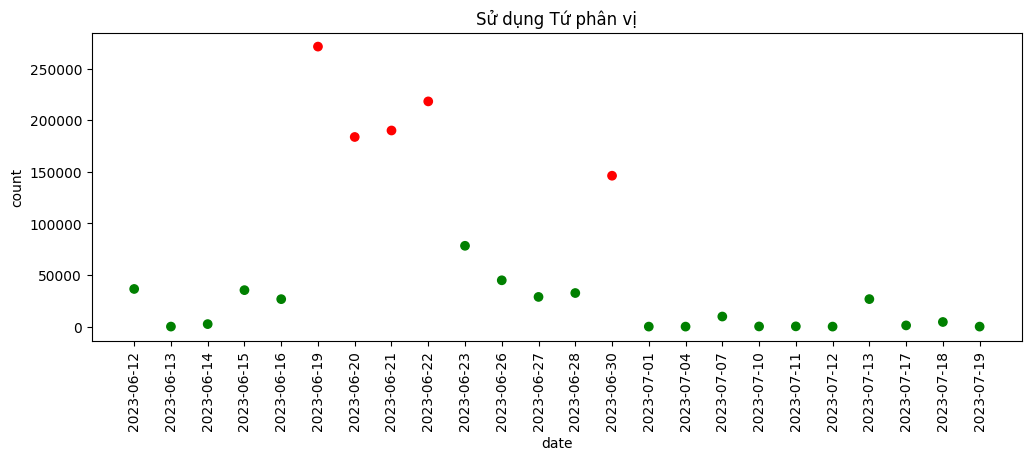

In [6]:
def find_anomalies(value, lower_threshold, upper_threshold):
    
    if value < lower_threshold or value > upper_threshold:
        return 1
    else: return 0

def iqr_anomaly_detector(data, column='count', threshold=1.1):
    
    df = data.copy()
    quartiles = dict(data[column].quantile([.25, .50, .75]))
    quartile_3, quartile_1 = quartiles[0.75], quartiles[0.25]
    iqr = quartile_3 - quartile_1

    lower_threshold = quartile_1 - (threshold * iqr)
    upper_threshold = quartile_3 + (threshold * iqr)

    print(f"Lower threshold: {lower_threshold}, \nUpper threshold: {upper_threshold}\n")
    
    df['Predictions'] = data[column].apply(find_anomalies, args=(lower_threshold, upper_threshold))
    return df


def run_iqr_anomaly_detector(data):
    time_df = format_date_time(data)
    iqr_df = iqr_anomaly_detector(time_df, threshold=1.1)
    plot_anomalies(iqr_df,title="Sử dụng Tứ phân vị")


run_iqr_anomaly_detector(data)

### Sử dụng thuật toán Isolation Forest


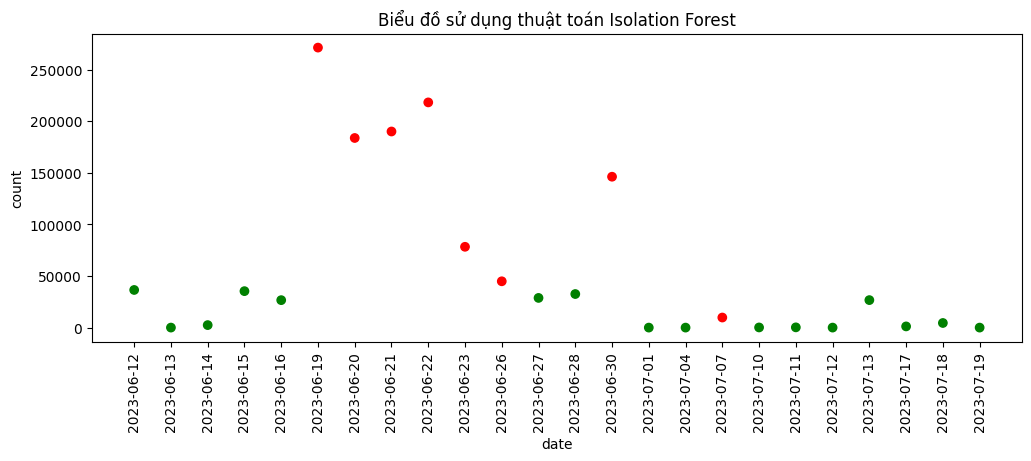

In [7]:
def run_isolation_forest(data): 
    time_df = format_date_time(data)
    iso_forest = IsolationForest(n_estimators=200)
    iso_df = fit_model(iso_forest, time_df)
    iso_df['Predictions'] = iso_df['Predictions'].map(lambda x: 1 if x==-1 else 0)
    plot_anomalies(iso_df, title='Biểu đồ sử dụng thuật toán Isolation Forest')


run_isolation_forest(data)

### Sử dụng thuật toán Median Absolute Deviation

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


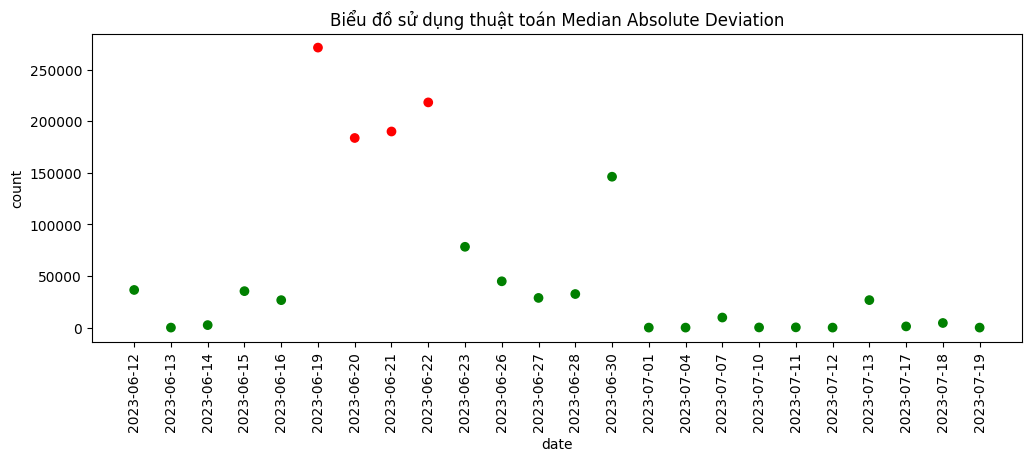

In [8]:
def run_median_absolute_devitation(data): 
    time_df = format_date_time(data)
    mad_model = MAD()
    mad_df = fit_model(mad_model, time_df)
    plot_anomalies(mad_df, title= 'Biểu đồ sử dụng thuật toán Median Absolute Deviation')

run_median_absolute_devitation(data)

### Sử dụng thuật toán KNN (K-Nearest Neighbours algorithm)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


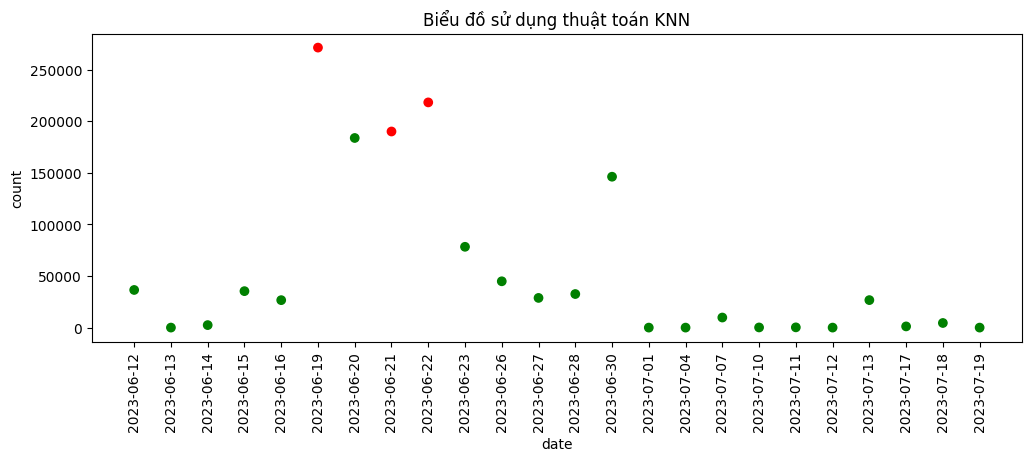

In [9]:
def run_KNN(data): 
    time_df = format_date_time(data)
    knn_model = KNN(n_neighbors=10)
    knn_df = fit_model(knn_model, time_df)
    plot_anomalies(knn_df, title= 'Biểu đồ sử dụng thuật toán KNN')


run_KNN(data)

### Sử dụng thuật toán HBOS

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


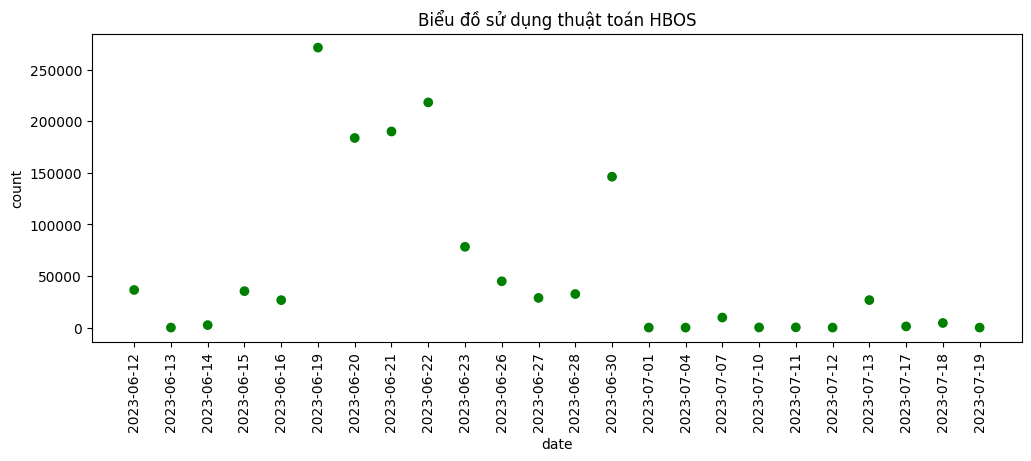

In [10]:
def run_HBOS(data):
    time_df = format_date_time(data)
    hbos_model =  HBOS()
    hbos_df = fit_model(hbos_model, time_df)
    plot_anomalies(hbos_df, title= 'Biểu đồ sử dụng thuật toán HBOS')

run_HBOS(data)

### Sử dụng thuật toán LOF

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


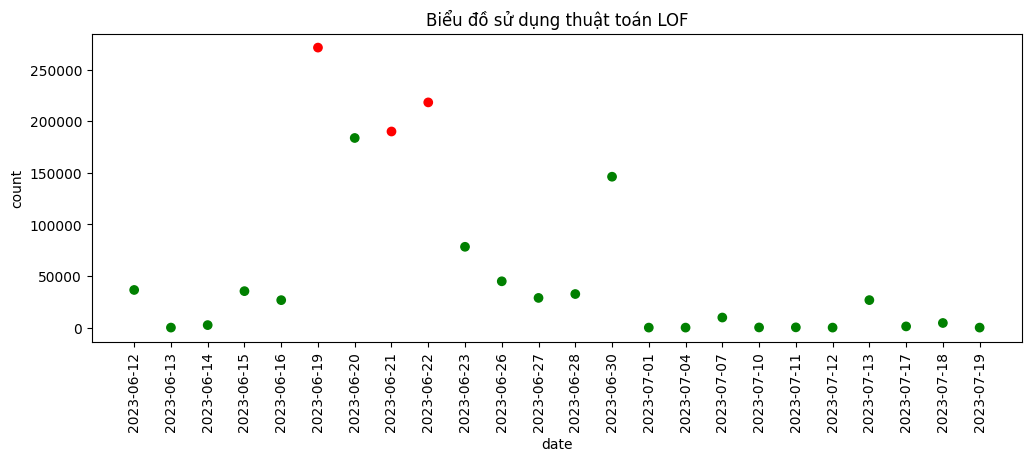

In [11]:
from pyod.models.lof import LOF
def run_LOF(data):
    time_df = format_date_time(data)
    lof_model =  LOF()
    lof_df = fit_model(lof_model, time_df)
    plot_anomalies(lof_df, title='Biểu đồ sử dụng thuật toán LOF')

run_LOF(data)   

### Sử dụng thuật toán OCSVM

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


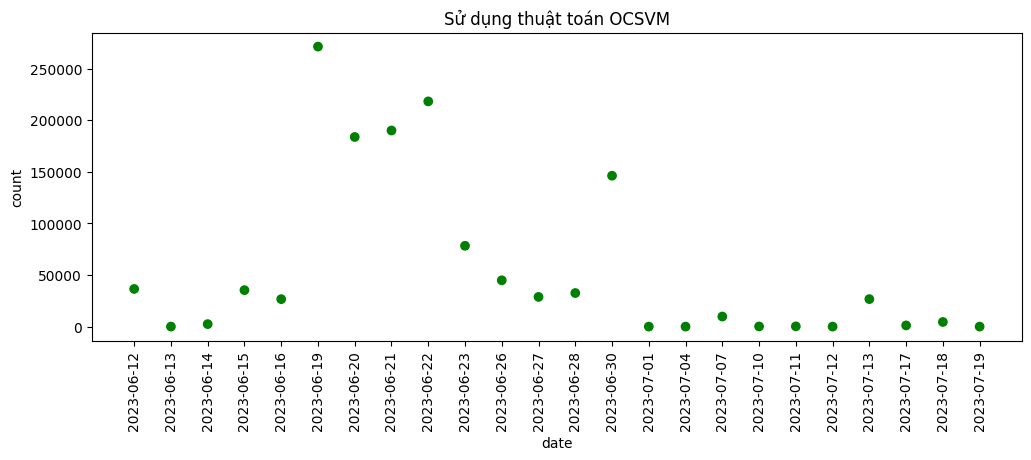

In [12]:

def run_OCSVM(data):
    time_df = format_date_time(data)
    ocsvm_model =  OCSVM()
    ocsvm_df = fit_model(ocsvm_model, time_df)
    plot_anomalies(ocsvm_df, title="Sử dụng thuật toán OCSVM")

run_OCSVM(data)